# 1. Import

**1.1 Import kagglehub and download dataset**

In [1]:
!pip install kagglehub
from google.colab import files

import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:39<00:00, 73.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


**1.2 Define the paths**

In [2]:
import os

# Define the dataset path
root_folder = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

data_dir = os.path.join(root_folder, 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/')

test_path = os.path.join(root_folder, 'test/test')
train_path = os.path.join(data_dir, 'train')
valid_path = os.path.join(data_dir, 'valid')

# Count the number of folders in a directory
def count_folders(path):
    if os.path.exists(path):
        return len([d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Count the number of files in a directory
def count_files(path):
    if os.path.exists(path):
        return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Function to count files in each folder of a given directory
def count_files_in_folders(path):
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        return {}

    folder_file_counts = {}
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            folder_file_counts[folder] = file_count

    return folder_file_counts

# Print counts
print(f"Number of folders in train_path: {count_folders(train_path)}")
print(f"Number of folders in valid_path: {count_folders(valid_path)}")
print(f"Number of files in test_path: {count_files(test_path)}")
print('-------------------------------------------------------------------')
# Count files in each folder
train_folder_counts = count_files_in_folders(train_path)
valid_folder_counts = count_files_in_folders(valid_path)
# Display results
print("Files in each folder (train_path):")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nFiles in each folder (valid_path):")
for folder, count in valid_folder_counts.items():
    print(f"{folder}: {count} files")

Number of folders in train_path: 38
Number of folders in valid_path: 38
Number of files in test_path: 33
-------------------------------------------------------------------
Files in each folder (train_path):
Grape___healthy: 1692 files
Corn_(maize)___healthy: 1859 files
Tomato___Tomato_mosaic_virus: 1790 files
Tomato___Target_Spot: 1827 files
Peach___healthy: 1728 files
Potato___healthy: 1824 files
Orange___Haunglongbing_(Citrus_greening): 2010 files
Corn_(maize)___Northern_Leaf_Blight: 1908 files
Tomato___Spider_mites Two-spotted_spider_mite: 1741 files
Apple___Black_rot: 1987 files
Apple___healthy: 2008 files
Tomato___Leaf_Mold: 1882 files
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961 files
Apple___Apple_scab: 2016 files
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 files
Strawberry___healthy: 1824 files
Squash___Powdery_mildew: 1736 files
Raspberry___healthy: 1781 files
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642 files
Blueberry___healthy: 1816 files
Tomato___healthy:

**1.3 Importing necessary libraries for data processing and visualization**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob

**1.4 Creating a DataFrame with Train and Valid**

In [4]:
# Initialize lists
image_paths = []
species_labels = []
disease_labels = []
dataset_split = []

# Function to process a dataset directory
def process_directory(base_path, split_name):
    for class_folder in os.listdir(base_path):
        class_folder_path = os.path.join(base_path, class_folder)
        if os.path.isdir(class_folder_path):
            species, disease = class_folder.split('___')
            for image_name in os.listdir(class_folder_path):
                image_paths.append(os.path.join(class_folder_path, image_name))
                species_labels.append(species)
                disease_labels.append(disease)
                dataset_split.append(split_name)

# Process train and valid
process_directory(train_path, 'train')
process_directory(valid_path, 'valid')

# Create DataFrame
df = pd.DataFrame({
    'image_path': image_paths,
    'species': species_labels,
    'disease': disease_labels,
    'split': dataset_split
})

# Display first few rows
print(df.head())


                                          image_path species  disease  split
0  /root/.cache/kagglehub/datasets/vipoooool/new-...   Grape  healthy  train
1  /root/.cache/kagglehub/datasets/vipoooool/new-...   Grape  healthy  train
2  /root/.cache/kagglehub/datasets/vipoooool/new-...   Grape  healthy  train
3  /root/.cache/kagglehub/datasets/vipoooool/new-...   Grape  healthy  train
4  /root/.cache/kagglehub/datasets/vipoooool/new-...   Grape  healthy  train


**1.5 Check for duplicates between train valid subset?**

In [5]:
# Extract only the file names (without directory paths)
train_file_names = [os.path.basename(path) for path in image_paths if 'train' in path]
valid_file_names = [os.path.basename(path) for path in image_paths if 'valid' in path]

# Find duplicates
duplicates = set(train_file_names).intersection(set(valid_file_names))

# Output the duplicates
if duplicates:
    print(f"Duplicate image files found: {duplicates}")
else:
    print("No duplicate image files found between train and valid datasets.")

No duplicate image files found between train and valid datasets.


# 2. Exploratory Data Analysis

**2.1 Dataset overview**

In [6]:
# Shape of the DataFrame
print("Shape of the DataFrame:", df.shape, end='\n\n')

# Display basic information about the DataFrame
print(df.info(), end='\n\n')

# Check unique species and diseases
# Get unique species and diseases
unique_species = df['species'].unique()
unique_diseases = df['disease'].unique()

# Create DataFrames
species_df = pd.DataFrame(unique_species, columns=['Unique Species'])
disease_df = pd.DataFrame(unique_diseases, columns=['Unique Diseases'])

# Display the tables
print("### Unique Species:", len(unique_species))
print(species_df.to_markdown(index=True))
print("\n### Unique Diseases:",len(unique_diseases))
print(disease_df.to_markdown(index=True))

Shape of the DataFrame: (87867, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87867 entries, 0 to 87866
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  87867 non-null  object
 1   species     87867 non-null  object
 2   disease     87867 non-null  object
 3   split       87867 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB
None

### Unique Species: 14
|    | Unique Species          |
|---:|:------------------------|
|  0 | Grape                   |
|  1 | Corn_(maize)            |
|  2 | Tomato                  |
|  3 | Peach                   |
|  4 | Potato                  |
|  5 | Orange                  |
|  6 | Apple                   |
|  7 | Strawberry              |
|  8 | Squash                  |
|  9 | Raspberry               |
| 10 | Blueberry               |
| 11 | Cherry_(including_sour) |
| 12 | Soybean                 |
| 13 | Pepper,_bell            |

### Unique Disease

**2.2 Species and disease distribution**

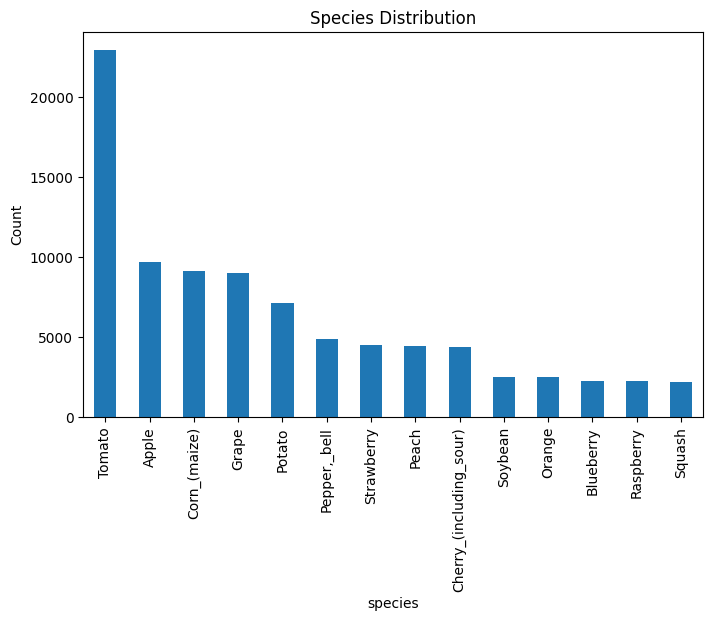

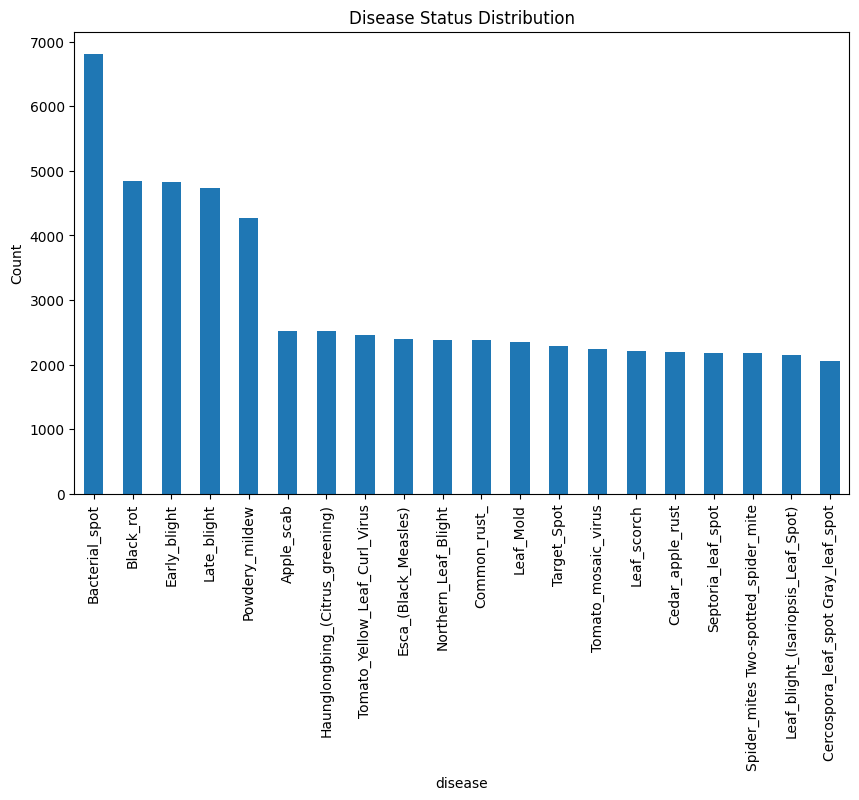

In [7]:
# Species distribution
species_counts = df['species'].value_counts()
plt.figure(figsize=(8, 5))
species_counts.plot(kind='bar', title="Species Distribution")
plt.ylabel("Count")
plt.show()


# Disease status distribution
disease_counts = df['disease'].value_counts()
disease_counts = disease_counts.drop('healthy', errors='ignore')
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar', title="Disease Status Distribution")
plt.ylabel("Count")
plt.show()

**2.3 Species distribution in train/valid**

| split   |   Apple |   Blueberry |   Cherry_(including_sour) |   Corn_(maize) |   Grape |   Orange |   Peach |   Pepper,_bell |   Potato |   Raspberry |   Soybean |   Squash |   Strawberry |   Tomato |
|:--------|--------:|------------:|--------------------------:|---------------:|--------:|---------:|--------:|---------------:|---------:|------------:|----------:|---------:|-------------:|---------:|
| train   |    7771 |        1816 |                      3509 |           7316 |    7222 |     2010 |    3566 |           3901 |     5702 |        1781 |      2022 |     1736 |         3598 |    18345 |
| valid   |    1943 |         454 |                       877 |           1829 |    1805 |      503 |     891 |            975 |     1426 |         445 |       505 |      434 |          900 |     4585 |


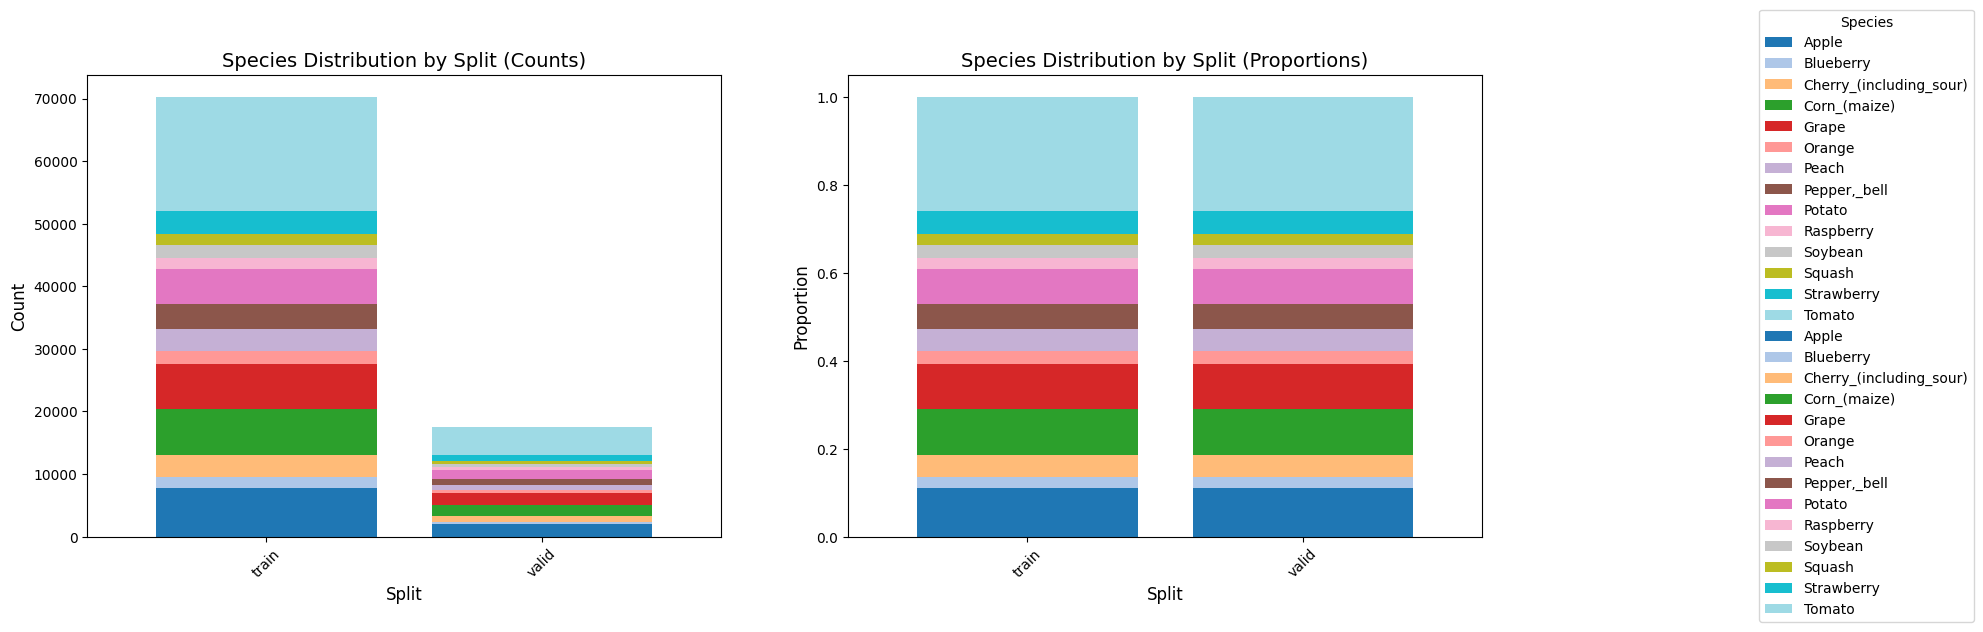

In [8]:
# Crosstab for species and split
species_crosstab = pd.crosstab(df['split'], df['species'])
print(species_crosstab.to_markdown())
species_crosstab = species_crosstab

species_crosstab_prop = pd.crosstab(df['split'], df['species'], normalize='index')
species_crosstab_prop = species_crosstab_prop
# fig 1
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

species_crosstab.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],  # Pass the first subplot axis
    colormap='tab20',
    width=0.8,
    legend=False
)
axes[0].set_title('Species Distribution by Split (Counts)', fontsize=14)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('Split', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

species_crosstab_prop.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],  # Pass the second subplot axis
    colormap='tab20',
    width=0.8,
    legend=False
)
axes[1].set_title('Species Distribution by Split (Proportions)', fontsize=14)
axes[1].set_ylabel('Proportion', fontsize=12)
axes[1].set_xlabel('Split', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

fig.legend(
    title='Species',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10
)


**2.4 Disease distribution in train/valid**

| split   |   Apple_scab |   Bacterial_spot |   Black_rot |   Cedar_apple_rust |   Cercospora_leaf_spot Gray_leaf_spot |   Common_rust_ |   Early_blight |   Esca_(Black_Measles) |   Haunglongbing_(Citrus_greening) |   Late_blight |   Leaf_Mold |   Leaf_blight_(Isariopsis_Leaf_Spot) |   Leaf_scorch |   Northern_Leaf_Blight |   Powdery_mildew |   Septoria_leaf_spot |   Spider_mites Two-spotted_spider_mite |   Target_Spot |   Tomato_Yellow_Leaf_Curl_Virus |   Tomato_mosaic_virus |   healthy |
|:--------|-------------:|-----------------:|------------:|-------------------:|--------------------------------------:|---------------:|---------------:|-----------------------:|----------------------------------:|--------------:|------------:|-------------------------------------:|--------------:|-----------------------:|-----------------:|---------------------:|---------------------------------------:|--------------:|--------------------------------:|----------------------:|----------:|
| train   

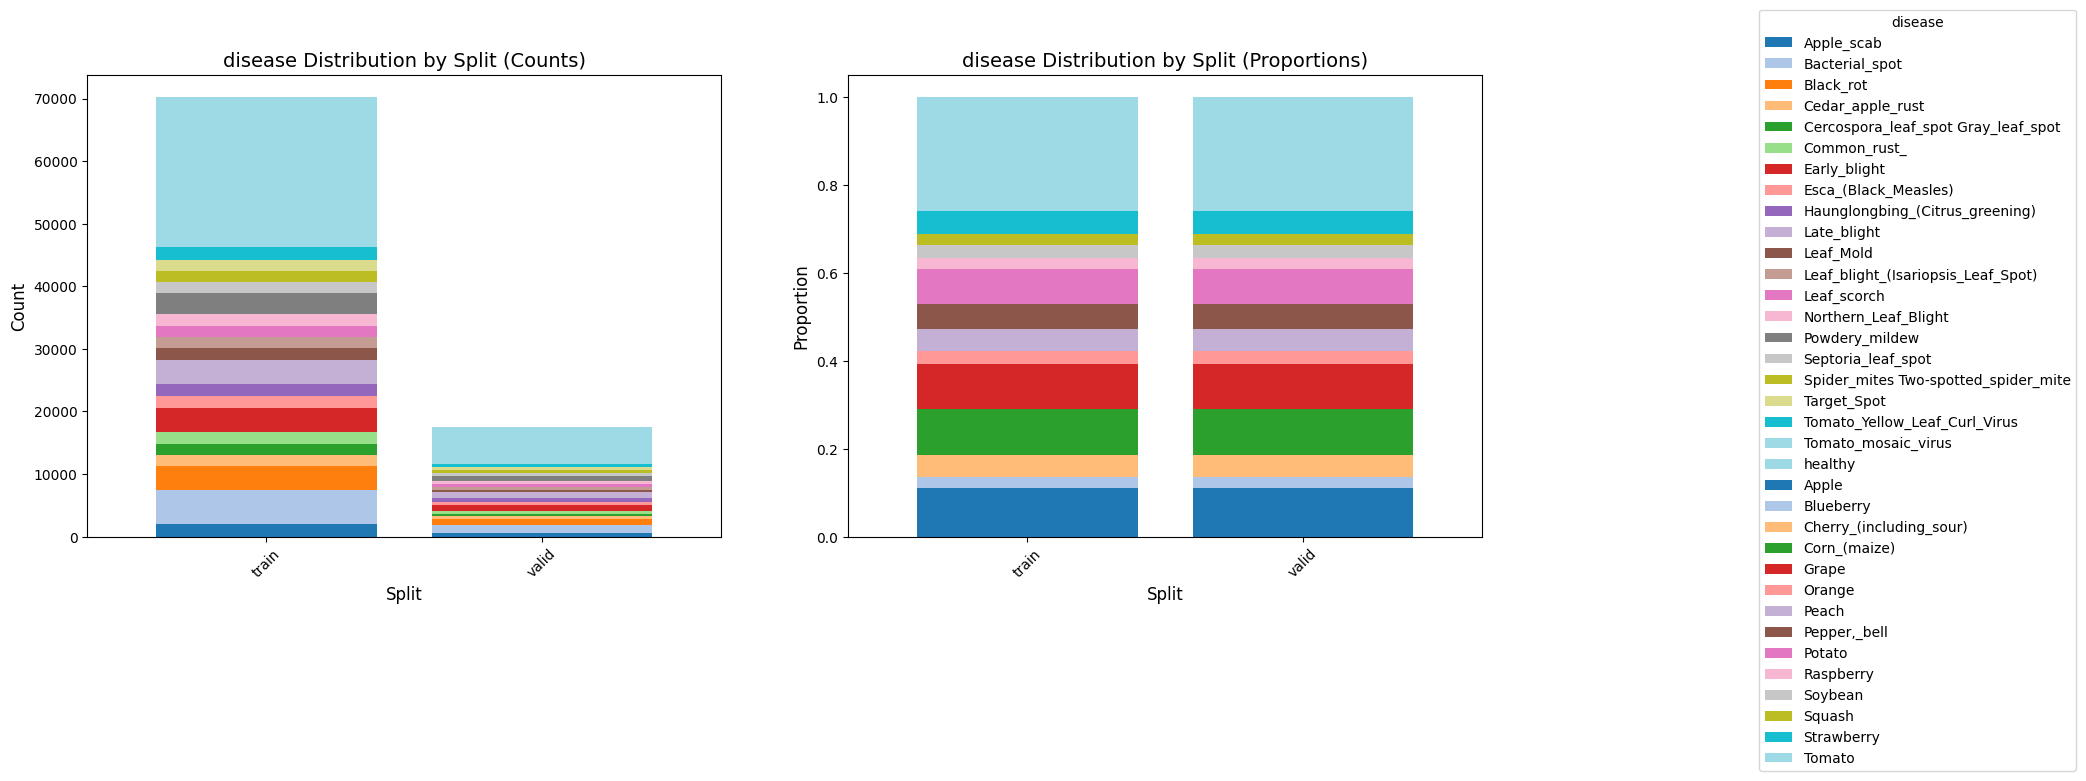

In [9]:
# Crosstab for species and split
disease_crosstab = pd.crosstab(df['split'], df['disease'])
print(disease_crosstab.to_markdown())
disease_crosstab = disease_crosstab

disease_crosstab_prop = pd.crosstab(df['split'], df['disease'], normalize='index')
disease_crosstab_prop = disease_crosstab_prop
# fig 1
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

disease_crosstab.plot(
    kind='bar',
    stacked=True,
    ax=axes[0],  # Pass the first subplot axis
    colormap='tab20',
    width=0.8,
    legend=False
)
axes[0].set_title('disease Distribution by Split (Counts)', fontsize=14)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('Split', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

species_crosstab_prop.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],  # Pass the second subplot axis
    colormap='tab20',
    width=0.8,
    legend=False
)
axes[1].set_title('disease Distribution by Split (Proportions)', fontsize=14)
axes[1].set_ylabel('Proportion', fontsize=12)
axes[1].set_xlabel('Split', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

fig.legend(
    title='disease',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10
)


**2.5 Species & Disease analysis**

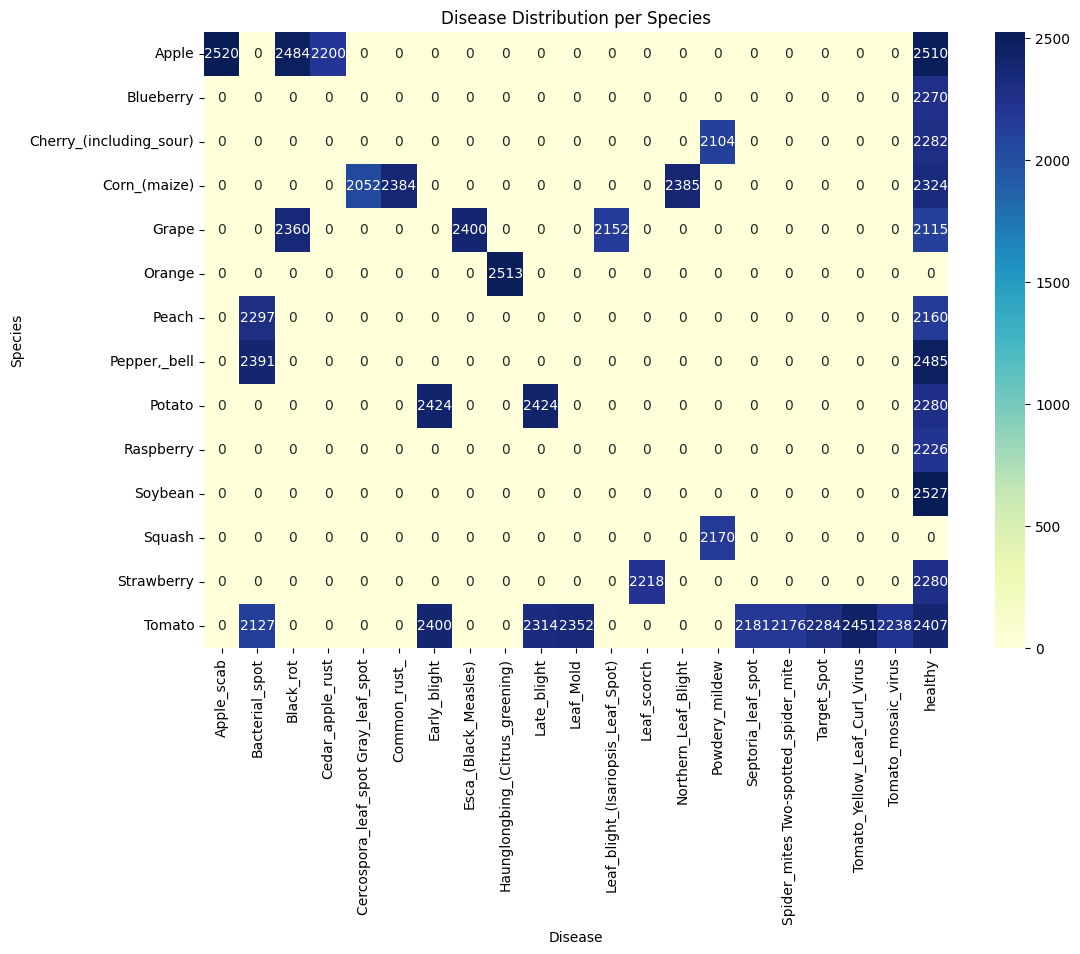

In [10]:
species_disease_counts = df.groupby(['species', 'disease']).size().unstack(fill_value=0)

# Visualize as a heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(species_disease_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Disease Distribution per Species")
plt.xlabel("Disease")
plt.ylabel("Species")
plt.show()

# some diseases can be occured in several species
# inbalanced data in some species. can be shown below.

**2.6 Healthy vs Diseased proportion**

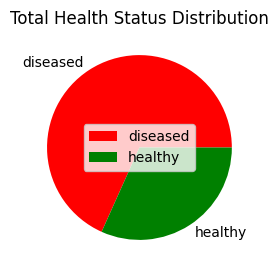

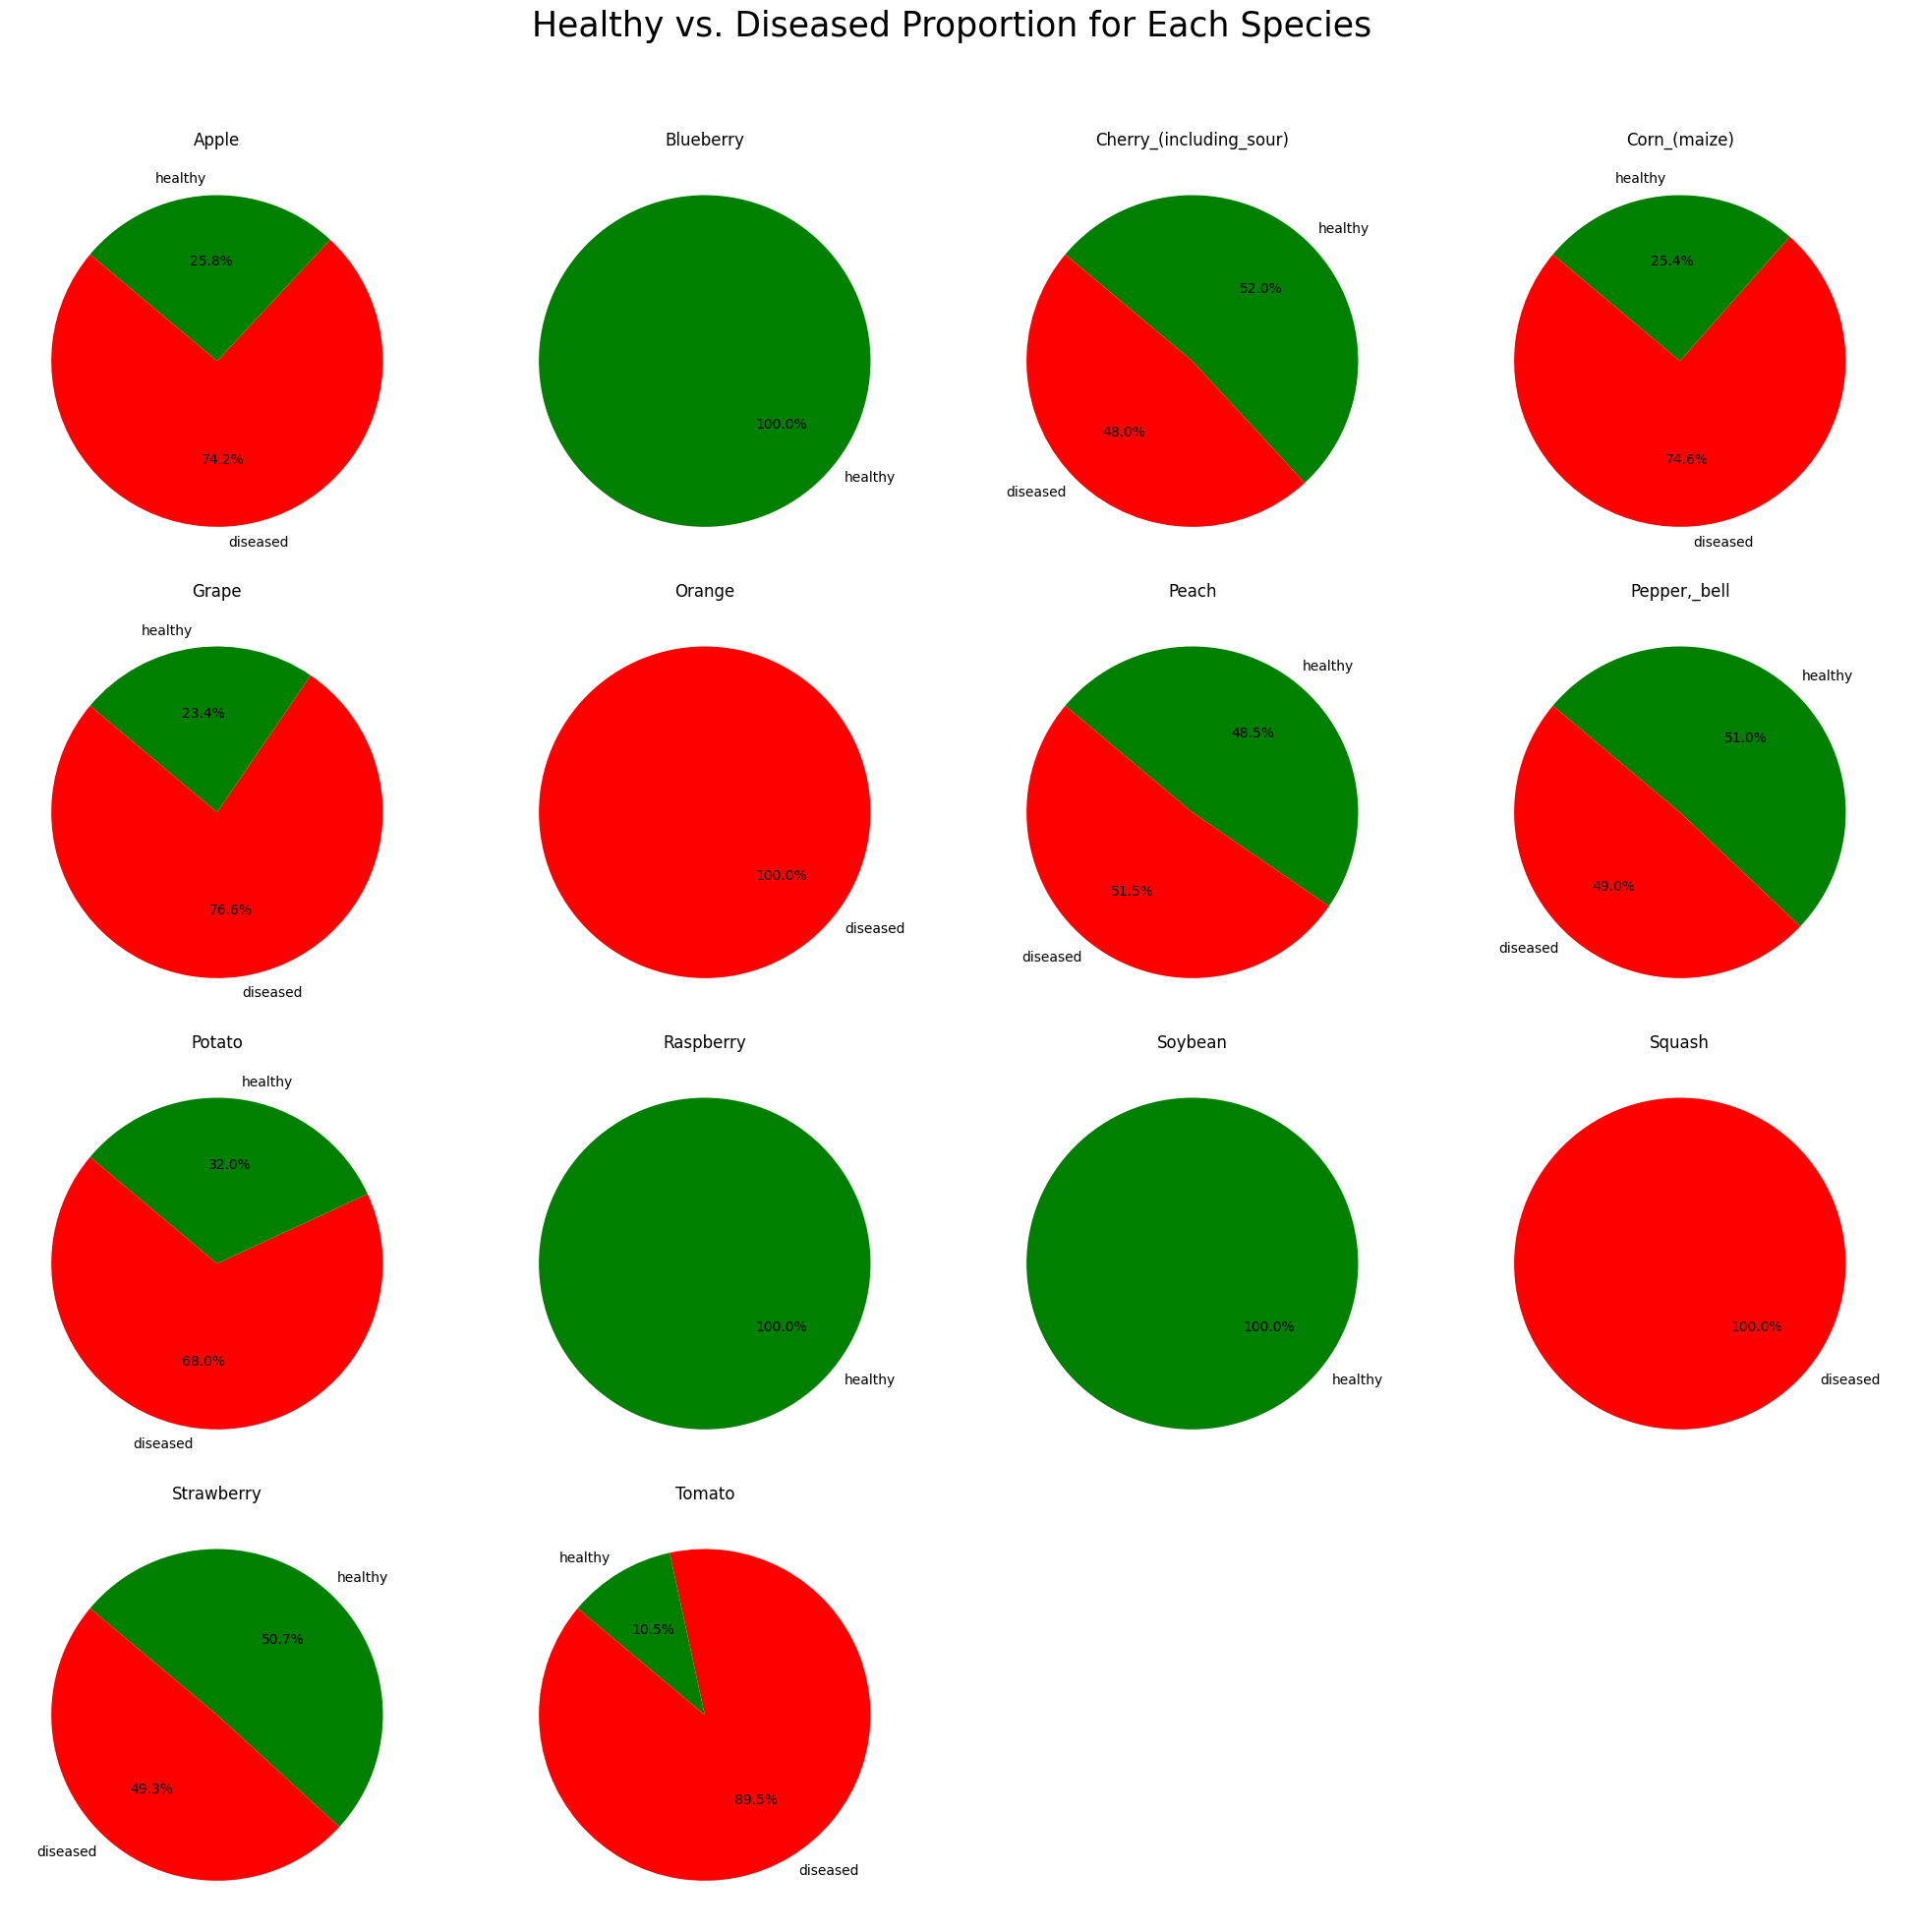

In [11]:
# Healthy vs Diseased: Total
df['health_status'] = df['disease'].apply(lambda x: 'healthy' if x == 'healthy' else 'diseased')
health_status_counts = df['health_status'].value_counts()
plt.figure(figsize=(3, 3))
labels = health_status_counts.index
colors = ['g' if label == 'healthy' else 'r' for label in labels]
health_status_counts.plot(kind='pie', colors=colors, title="Total Health Status Distribution")
plt.legend(labels = ['diseased', 'healthy'], loc='center')
plt.axis('off')
plt.show()

# Healthy vs Diseased: Each species
species_health_counts = df.groupby(['species', 'health_status']).size().unstack(fill_value=0)
# Number of columns per row in the subplot
columns = 4
rows = (len(species_health_counts) + columns - 1) // columns  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, columns, figsize=(20, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each species
for i, species in enumerate(species_health_counts.index):
    # Get sizes and labels, filtering out zeros
    sizes = species_health_counts.loc[species].values
    labels = species_health_counts.columns
    non_zero_indices = sizes > 0  # Filter for non-zero values
    sizes = sizes[non_zero_indices]
    labels = labels[non_zero_indices]
    colors = ['g' if label == 'healthy' else 'r' for label in labels]

    # Plot the pie chart
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(species)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Add a global title
plt.suptitle("Healthy vs. Diseased Proportion for Each Species", fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
plt.show()

# Only Healthy: Blueberry, Raspberry, Soybean
# Only diseased: Orange, Squash

**2.7 Image Resolution and Quality check**

In [ ]:
print(df.columns)

Index(['image_path', 'species', 'disease', 'split', 'health_status'], dtype='object')


In [12]:
import cv2

def get_image_size(img_path):

    img = cv2.imread(img_path)
    return (img.shape[1], img.shape[0])  # (Width, Height)

image_dimensions = [get_image_size(img_path) for img_path in df['image_path']]


unique_dimensions = set(image_dimensions)
print("Unique Image Dimensions:")
for dim in unique_dimensions:
    print(f"Width: {dim[0]}, Height: {dim[1]}")

Unique Image Dimensions:
Width: 256, Height: 256


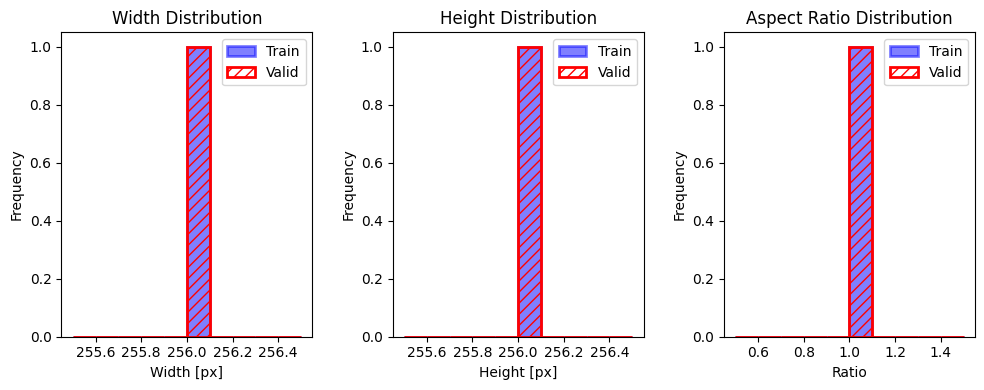

In [14]:
def analyze_image_properties(image_path):
    img = Image.open(image_path)
    width, height = img.size
    aspect_ratio = width / height
    mean_color = np.array(img).mean(axis=(0, 1))
    return width, height, aspect_ratio, mean_color

# Sample images and analyze properties
train_images = glob.glob(os.path.join(train_path, "*/*.JPG"))
train_image_properties = [analyze_image_properties(img) for img in train_images]

valid_images = glob.glob(os.path.join(valid_path, "*/*.JPG"))
valid_image_properties = [analyze_image_properties(img) for img in valid_images]

# Calculate weights for relative frequencies
weights_train = np.ones(len(train_image_properties)) / len(train_image_properties)
weights_valid = np.ones(len(valid_image_properties)) / len(valid_image_properties)

# Visualize properties
plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.hist([prop[0] for prop in train_image_properties], weights=weights_train, edgecolor='blue', facecolor='blue', alpha=0.5, linewidth=2, label="Train")
plt.hist([prop[0] for prop in valid_image_properties], weights=weights_valid, edgecolor='red', facecolor='none', hatch='///', linewidth=2, label="Valid")
plt.title('Width Distribution')
plt.xlabel("Width [px]")
plt.ylabel("Frequency")
plt.legend()
plt.subplot(132)
plt.hist([prop[1] for prop in train_image_properties], weights=weights_train, edgecolor='blue', facecolor='blue', alpha=0.5, linewidth=2, label="Train")
plt.hist([prop[1] for prop in valid_image_properties], weights=weights_valid, edgecolor='red', facecolor='none', hatch='///', linewidth=2, label="Valid")
plt.title('Height Distribution')
plt.xlabel("Height [px]")
plt.ylabel("Frequency")
plt.legend()
plt.subplot(133)
plt.hist([prop[2] for prop in train_image_properties], weights=weights_train, edgecolor='blue', facecolor='blue', alpha=0.5, linewidth=2, label="Train")
plt.hist([prop[2] for prop in valid_image_properties], weights=weights_valid, edgecolor='red', facecolor='none', hatch='///', linewidth=2, label="Valid")
plt.title('Aspect Ratio Distribution')
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

**2.8 Distribution of RGB color channels**

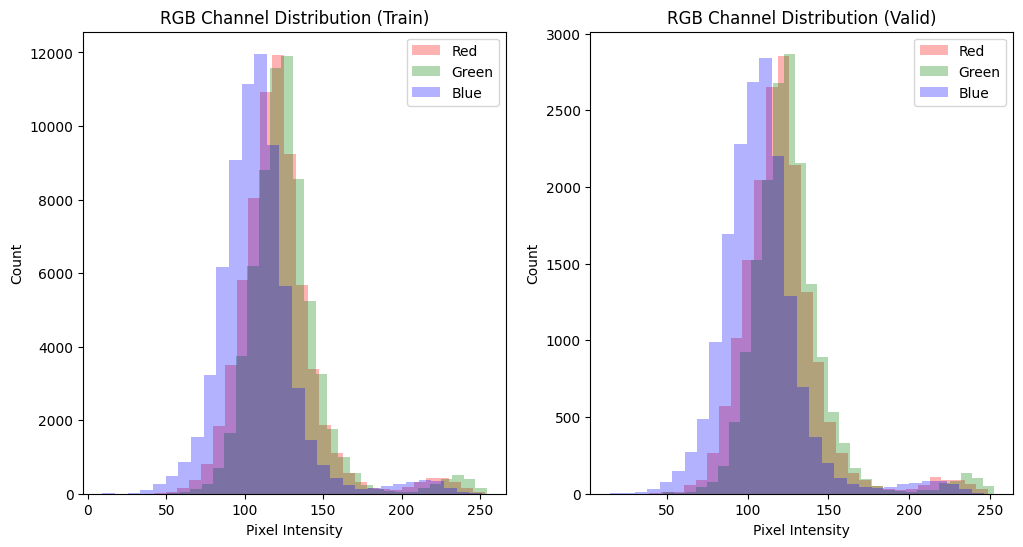

In [15]:
# Convert list of tuples to separate lists for R, G, B
mean_colors_train = [prop[3] for prop in train_image_properties]
mean_colors_valid = [prop[3] for prop in valid_image_properties]

reds = [color[0] for color in mean_colors_train]
greens = [color[1] for color in mean_colors_train]
blues = [color[2] for color in mean_colors_train]

# Plot histograms for each color channel
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(reds, bins=30, color='red', alpha=0.3, label='Red')
plt.hist(greens, bins=30, color='green', alpha=0.3, label='Green')
plt.hist(blues, bins=30, color='blue', alpha=0.3, label='Blue')
plt.title('RGB Channel Distribution (Train)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()

reds = [color[0] for color in mean_colors_valid]
greens = [color[1] for color in mean_colors_valid]
blues = [color[2] for color in mean_colors_valid]

plt.subplot(122)
plt.hist(reds, bins=30, color='red', alpha=0.3, label='Red')
plt.hist(greens, bins=30, color='green', alpha=0.3, label='Green')
plt.hist(blues, bins=30, color='blue', alpha=0.3, label='Blue')
plt.title('RGB Channel Distribution (Valid)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()
plt.show()

**2.9 Visualize sample images**

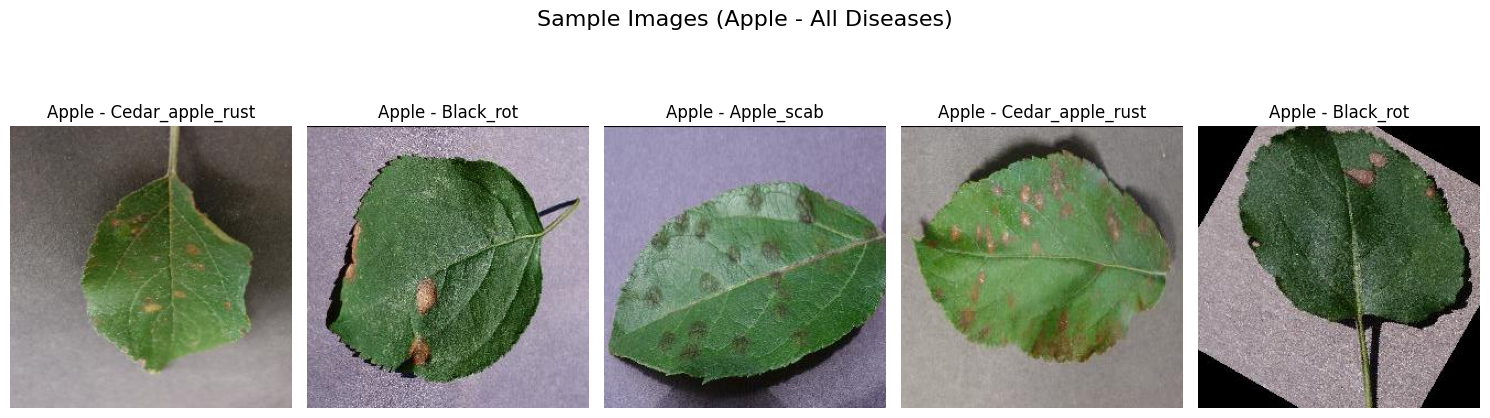

In [16]:
def show_sample_images(df, species=None, disease=None, n=5):
    """
    Displays n sample images for a specific species and disease combination.
    If species or disease is None, it randomly selects any combination.
    """
    if species and disease:
        subset = df[(df['species'] == species) & (df['disease'] == disease)]
    elif species:
        subset = df[df['species'] == species]
    elif disease:
        subset = df[df['disease'] == disease]
    else:
        subset = df

    sample_images = subset.sample(n)

    # Display images
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    fig.suptitle(f"Sample Images ({species or 'All Species'} - {disease or 'All Diseases'})", fontsize=16)

    for i, (idx, row) in enumerate(sample_images.iterrows()):
        img = Image.open(row['image_path'])
        axes[i].imshow(img)
        axes[i].set_title(f"{row['species']} - {row['disease']}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# 1. Display images for a specific species and disease
#show_sample_images(df, species="Tomato", disease="healthy", n=5)

# 2. Display images for a specific species
show_sample_images(df, species="Apple", n=5)

# 3. Display random images from the dataset
#show_sample_images(df, n=5)

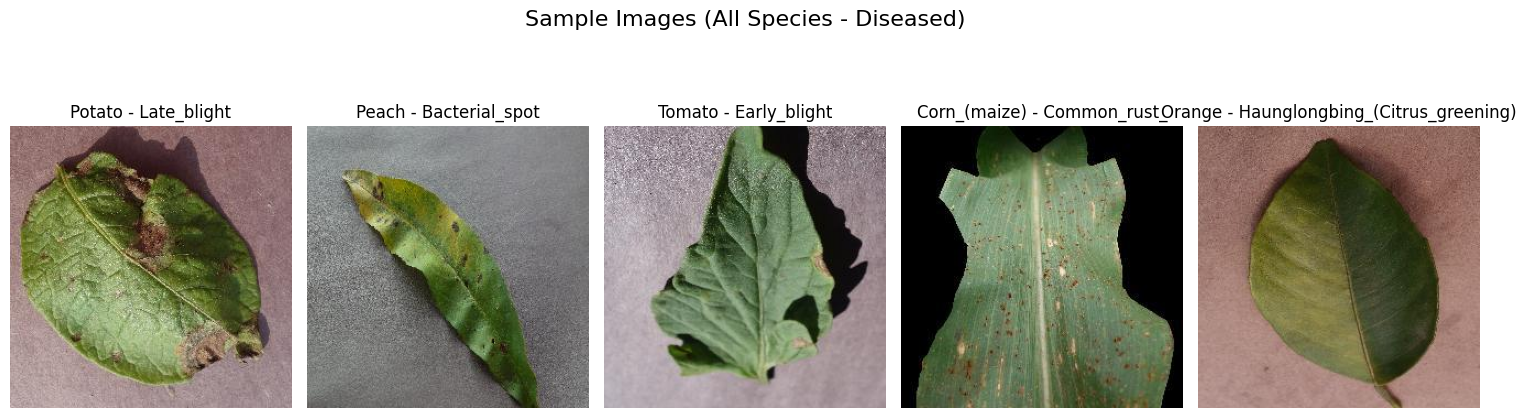

In [ ]:
def show_sample_images(df, species=None, disease=None, n=5, healthy=False):
    """
    Displays n sample images for a specific species and disease combination.
    If species or disease is None, it randomly selects any combination.
    If healthy is True, it shows only healthy plants; otherwise, it shows diseased plants.
    """
    if healthy:
        subset = df[df['disease'] == 'healthy']  # Filter for healthy plants
    else:
        subset = df[df['disease'] != 'healthy']  # Filter for diseased plants

    if species:
        subset = subset[subset['species'] == species]
    if disease:
        subset = subset[subset['disease'] == disease]

    sample_images = subset.sample(n)

    # Display images
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    fig.suptitle(f"Sample Images ({species or 'All Species'} - {'Healthy' if healthy else 'Diseased'})", fontsize=16)

    for i, (idx, row) in enumerate(sample_images.iterrows()):
        img = Image.open(row['image_path'])
        axes[i].imshow(img)
        axes[i].set_title(f"{row['species']} - {row['disease']}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Display 5 diseased plant images (any species, any disease)
show_sample_images(df, n=5, healthy=False)